# Programming for Chemists: File Input/Output Using Pandas and Plotting Using Matplotlib

**Importance for scientists:**
* The ability to read, manipulate and analyse data; one of the most important tasks for any scientist.

As scientists, one of the key applications of programming is processing and analysing data. These data can arrive from a piece of lab equipment, a computer program, manually conducted experiment  etc... and there are a plethora of ways to read in data into Python, but the most important tool at the disposal of data scientists and analysts working in Python today is the [pandas](https://pandas.pydata.org/) library, making up the backbone of most projects involving data. 

* In this session we will cover the basics of the pandas library along with [matplotlib](https://matplotlib.org/) used to visualise data. 

* Pandas is a **very** extensive library and we will only have time for the fundamentals; but the [pandas documentation](https://pandas.pydata.org/docs/) is thorough, providing good descriptions of all features along with examples. 

## Excel vs. Pandas
* Conventionally Microsoft Excel is used for data processing and analysis due to its versatility, ease of use and reliability, but it has inherent limitations:

    * It will slow down as the data sets become larger.
    * Excel has a limit of 1,048,576 rows in a spreadsheet.
    * It is harder to create and apply mathematical equations on the data. 

* Pandas is a solution which overcomes all these limitations:

    * It is incredibly fast at processing very large volumes of data. You can apply hundreds of computations to millions of data points instantly using pandas.
    * The only limitation on the amount of data is the computing power and memory of the computer it is running on. 
        * **If Public Health England had used pandas in place of their Excel spreadsheet they would have never lost 16000 COVID test results.**
    * It can talk to fast numerical libraries such as numpy and scipy offering mathematical operations with the speed of the C programming language.
    * It contains a machine learning backbone making it better at automatically reading and categorizing data. It can clean up data much easier than Excel and is capable of automating a lot of other processes including repairing data holes and eliminating duplicates.

* Pandas is not necessarily a replacement for Excel, with both often being used together. 
    * You can start a project in Excel and port it over to pandas which can easily read Comma Separated Value files (`.csv`) files. 
    * For reference the name pandas is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. 

* As pandas is a separate Python library we have to import it in order to use it:

In [ ]:
import pandas as pd

* Pandas deals with the following three data structures:

| Data Structure | Dimensions      | Description                                        |
|:---------------|:---------------:|:---------------------------------------------------|  
| Series         | 1               | 1D labeled homogeneous array, size immutable.      |
| DataFrame      | 2               | General 2D labeled, size-mutable tabular structure |
| Panel          | 3               | General 3D labeled, size-mutable array.            |

* All three data structures are **value** mutable (can be changed) and except Series all are size mutable. 
* Out of the three data structures **DataFrames** are the most widely used and important structures so will make up the entirety of this Pandas tutorial. 

## DataFrame

* A DataFrame is a two-dimensional array with heterogeneous data (data with high variability of data types and formats). Consider the following example:

| Name  | Age   | Grade  |
|:------|:-----:|:------:|  
| Rob   | 27    |  A     |
| Susan | 34    |  C     |
| Jane  | 71    |  A     |
| Tom   | 62    |  D     |
| Brian | NaN   |  B     |

* We can implement this in pandas using the following constructor:

    `pd.DataFrame(data, index, columns, dtype)`

* **data:** data takes various forms like `ndarray`, `series`, `map`, `lists`, `dict`, constants and also another DataFrame.
* **index:** For the row labels, the Index to be used for the resulting frame is `np.arange(n)` if no index is passed.
* **columns:** For column labels, the default syntax is  `np.arange(n)`. This is only true if no index is passed.
* **dtype:** Data type of each column.

* The acronym, NaN, is not a grandmother but stands for 'Not a Number' and pandas can easily handle missing data using numpy's `nan` command: `np.nan` or the "None" statement

In [ ]:
import numpy as np # numpy is needed for the nan entry

# create a nested list containing our data
data = [['Rob', 27, 'A'], 
        ['Susan', 34, 'C'], 
        ['Jane', 71, 'A'], 
        ['Tom', 62, 'D'],
        ['Brian', np.nan, 'B']] # switch np.nan for None and check the output

# call the DataFrame from the pandas library and assign names to each column
df = pd.DataFrame(data, columns=['Name', 'Age', 'Grade'])

print(df)

## Reading Data

Rather than spend days looking at all the pandas functions in a general overview, we will learn the important fundamentals by loading and analysing a real world data set reporting global climate change data between the years 1750 - 2015 taken from [Berkeley Earth](http://berkeleyearth.org/archive/data/). 

* The file is in a Comma-Separated Value format (.csv) which can be loaded using `pd.read_csv()`. 
* We are going to learn useful pandas commands applied to **real data** not small ideal examples from textbooks.  This file contains 9 data columns:

    * **dt:** The date: year-month-day.
    * **LandAverageTemperature:** The global temperatureaverage land temperature for that month, in celsius.
    * **LandAverageTemperatureUncertainity:** The 95% confidence interval around the average value of the land temperature, in celsius.
    * **LandMaxTemperature:** The maximum land temperature recorded for that month, in celsius.
    * **LandMaxTemperatureUncertainty:** The 95% confidence interval around the maximum value of the land temperature, in celsius.
    * **LandMinTemperature:** The minimum land temperature recorded in that month, in celsius.
    * **LandMinTemperatureUncertainty:** The 95% confidence interval around the minimum value of the land temperature, in celsius.
    * **LandAndOceanAverageTemperature:** The average temperature of the land and ocean, in celsius.
    * **LandAndOceanAverageTemperatureUncertainty** The 95% confidence interval around the average value of the land and ocean temperatures, in celsius.

In [ ]:
data_url = "https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/data/GlobalLandTemperatures_GlobalTemperatures.csv"

# read the data file using pd.read_csv()
df = pd.read_csv(data_url)

# we tell the DataFrame that the 'dt' column is a date-time format. This is a smart command and will be able to understand a variety of date-time formats
df['dt'] =  pd.to_datetime(df['dt'])

Running this command loads the csv file and assigns it to the name `df` short for DataFrame. Note that we have not asked it to print the data due to it containing > 3000 rows. Be careful when using the `print` command around large data sets as you can end up waiting for the processor to print out (possibly) billions of data values to the screen. Luckily pandas has a multitude of functions allowing us to view and manipulate the data without having to view it in its entirety. 

## Writing Data

Writing data is just as simple as reading in data, using the [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) function. We can send our data set to a file of our choosing using the following syntax:

    `name_of_dataframe.to_csv('name of file to save to')

In [ ]:
df.to_csv("Cool_filename.csv") # try other file types too

* **Pandas has a large number of functions for writing all manner of different file types.** See [this link](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for a summary.

## useful Pandas functions

* <font color='red'>View information about the DataFrame using `info()`:</font>

In [ ]:
df.info()

* <font color='red'>View the top and bottom x-rows of the DataFrame using `.head` and `.tail`:</font>

In [ ]:
# print the top two rows
df.head(2)

In [ ]:
# print the bottom two rows


* Display the index labels of each row using `.index`:

In [ ]:
df.index

* <font color='red'>Display the labels of each column using `.columns`:</font>

* `describe` shows a statistical summary of the DataFrame including:
    * **Count:** Number of rows.
    * **mean:** The average of the data in each column.
    * **std:** The standard deviation of each column.
    * **min:** The minimum value in each column.
    * **25%:** 25% of your data in the column is below this value
    * **50%:** 50% of your data in the column is below this value
    * **75%:** 75% of your data in the column is below this value
    * **max:** The maximum value in each column

In [ ]:
df.describe()

* <font color='red'>Transpose data using `.T`:</font>

* Sort values in specific columns using `.sort_values()`:

In [ ]:
# sort the LandAverageTemperature from lowest -> highest 
df.sort_values(by='LandAverageTemperature')

* A single column can be selected using the same syntax we previously used for dictionaries:

In [ ]:
df['LandAverageTemperature']

* We can also slice our data like we did in the previous NumPy session:

In [ ]:
# slice the DataFrame selecting the first 3 rows
df[0:3]

* Conditions on how data is selected can be applied. Consider selecting average land temperatures > 0 degrees:

In [ ]:
df[df['LandAverageTemperature'] > 0]

* Lets extract data from the 1st January 1801 to the 1st May 2010; done using a `mask` which is a means of extracting data from a DataFrame given certain criteria:
    * First we supply the conditions on the `dt` column that the dates we want are >= 1801-01-01 and <= 2010-05-01.
    * We then pass these conditions to the DataFrame using `loc()` which allows us to access a group of rows or columns by labels.

In [ ]:
# specify the start and end date of our range
start_date = '1801-01-01'
end_date = '2010-05-01'

# create the mask by selecting the 'dt' column from df, stating we want values >=start_date and <= end_date. & means and
mask = (df['dt'] >= start_date) & (df['dt'] <= end_date)

# apply the mask to the DataFrame
df_range = df.loc[mask]

print(df_range.head(5))

print(df_range.tail(5))

* We now have an idea of how pandas works, so lets now start visualising the data to really bring it to life; done using `matplotlib`.

## Plotting Data using Matplotlib

One of Python's most popular functions is to visualise data, either to understand the data better, or to display the data to convey the results to someone else. 

* **Matplotlib**, arguably the most popular graphing and data visualization module for Python, allows for a very wide range of plots to be produced, quickly and easily. 
* The name derives from the fact matplotlib provides a MATLAB-like interface for plotting whilst being free and open source. 
* Start by importing the library along with numpy (just to make sure it is loaded!). 
    * We also load a sub module of matplotlib called `DateFormatter` which allows it to understand date formats correctly:

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np

* Plotting two data columns in matplotlib can be done using the syntax: 
    `plt.plot(x data, y data)`. 
* Lets plot the average temperature vs. the date: 

In [ ]:
# assign the date column from the DataFrame as the x-data
x_dat = df['dt']
# assign the average land temperature from the DataFrame as the y-data
y_dat = df['LandAverageTemperature']

# plot the data
plt.plot(x_dat, y_dat)

* We can do better than this:

    * There is too much data for one plot and does it show us anything?
    * Axis labels
    * Title
    * etc...

* A useful plot will be the average temperature **each year** not every month of each year, which we can do by:

    * Using the pandas `dt` accessor to access the years in the date-time column 'dt'.
    * Group the data into years by passing it the year numbers we just calculated, and calculate the mean on the 'LandAverageTemperature' column aggregating as a new column using the `.agg()` command which allows us to apply specific functions to specific columns. In this case we want to calculate the `mean` of the temperatures of each year using `.agg(['mean'])`.
    * Assign this to a new DataFrame and then plot it.

* We will use some very important matplotlib commands:

    * `fig, ax = plt.subplots()`: A function that returns a tuple containing a figure (fig) and axes (ax) object(s). 
        * We call this before we begin any plotting as it returns two objects: 
            * One for changing figure-level attributes (fig). 
            * One for everything else (ax). Axes define a subplot, we can write our own x-axis limits, y-axis limits, their labels, the type of graph. It controls every detail inside the subplot.
    * `ax.set_xlabel()` and `.set_ylabel()`: Used to set axis labels.
    * `ax.set_title()`: Used to set the figure title.
    * `plt.show()`: Prints the plot to the screen. Notice above how we did not use this and it still showed the graph? This is a feature of the Jupyter notebook, but when running locally you need to use `plt.show()` to print the graph to screen.


In [ ]:
# create the figure (fig) and axes (ax) objects
fig, ax = plt.subplots()

# first we extract the years from YYYY-MM-DD format
# we call the .dt command from the DateFormatter library and ask it to extract the .year from all the dates
# mask becomes a pandas series which holds the years for us 
mask = df['dt'].dt.year

# apply the mask to the DataFrame and assign to a new DataFrame
# we use `.reset_index() at the end of the line as when we apply the groupby and agg commands the new DataFrame loses access to the column names 
# This means we have to reset the indexing to remind it what they are!
df_avg_yearly_temp = df.groupby(mask)['LandAverageTemperature'].agg(['mean']).reset_index()

# x-data is the year column and y-data is the mean column
x_dat = df_avg_yearly_temp['dt']
y_dat = df_avg_yearly_temp['mean']

# plot the data
ax.plot(x_dat,y_dat)

# add the axis labels using set_xlabel and set_ylabel
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature / $^\circ$C') # LaTeX syntax is also recognised. Do not worry if you have not heard of LaTeX, it is not important here

# set title using set_title
ax.set_title('Average yearly temperature')

# print the plot to screen
plt.show()

# if you want to save your figure, you can use the command plt.savefig('name of file')
# plt.savefig('name of file.png')

* This plot is better than our previous attempt; showing a much clearer upward trend in average yearly temperatures as time passes. 
    * What about the maximum and minimum temperatures? We can follow the above procedure and plot these two data sets with our average yearly temperature data on the same graph. 

* We will assign labels to each of our plots within the plot command:

    `.plot(x data,y data, label="legend label")`,

* and by calling `ax.legend()` it will automatically construct the legend for us:

In [ ]:
# create the figure (fig) and axes (ax) objects
fig, ax = plt.subplots()

# first we extract the years from YYYY-MM-DD format
mask = df['dt'].dt.year

# group the maximum temperature data by year and take the average
df_max_yearly_temp = df.groupby(mask)['LandMaxTemperature'].agg(['mean']).reset_index()
# group the minimum temperature data by year and take the average
df_min_yearly_temp = df.groupby(mask)['LandMinTemperature'].agg(['mean']).reset_index()

# assign x and y-data for max temperature
x_max_dat = df_max_yearly_temp['dt']
y_max_dat = df_max_yearly_temp['mean']

# assign x and y-data for min temperature
x_min_dat = df_min_yearly_temp['dt']
y_min_dat = df_min_yearly_temp['mean']

# plot the average max temperature data
ax.plot(x_max_dat,y_max_dat, label="Avg Max temp")

# plot the average temperature data
ax.plot(x_dat,y_dat, label="Avg temp") 

# plot the average min temperature data
ax.plot(x_min_dat,y_min_dat, label="Avg Min temp")

# add the axis labels using set_xlabel and set_ylabel
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature / $^\circ$C') # LaTeX syntax is also recognised. Do not worry if you have not heard of LaTeX, it is not important here

# set title using set_title
ax.set_title('Average maximum and minimum temperature')

# call the legend command which will construct the legend using the labels we applied to each of our plots and automatically change the colours
ax.legend()

# print the plot to screen
plt.show()

* As there is no maximum and minimum temperature data before the year ~ 1850, we will now specify the range of the plot to remove the whitespace on the left of the Max and Min temperature plots using `axes.set_xlim([xmin,xmax])`:

In [ ]:
# create the figure (fig) and axes (ax) objects
fig, ax = plt.subplots()

# first we extract the years from YYYY-MM-DD format
mask = df['dt'].dt.year

# group the maximum temperature data by year and take the average
df_max_yearly_temp = df.groupby(mask)['LandMaxTemperature'].agg(['mean']).reset_index()
# group the minimum temperature data by year and take the average
df_min_yearly_temp = df.groupby(mask)['LandMinTemperature'].agg(['mean']).reset_index()

# assign x and y-data for max temperature
x_max_dat = df_max_yearly_temp['dt']
y_max_dat = df_max_yearly_temp['mean']

# assign x and y-data for min temperature
x_min_dat = df_min_yearly_temp['dt']
y_min_dat = df_min_yearly_temp['mean']

# plot the average max temperature data
ax.plot(x_max_dat,y_max_dat, label="Avg Max temp")
# plot the average temperature data
ax.plot(x_dat,y_dat, label="Avg temp") 
# plot the average min temperature data
ax.plot(x_min_dat,y_min_dat, label="Avg Min temp")

# add the axis labels using set_xlabel and set_ylabel
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature / $^\circ$C')

# set title using set_title
ax.set_title('Average maximum and Minimum temperature')

# set the range of the x-axis data
ax.set_xlim([1850, 2015])

# call the legend command which will construct the legend using the labels we applied to each of our plots and automatically change the colours
# legend position can be specified using location positions:
# best
# upper right
# upper left
# lower left
# lower right
# right
# center left
# center right
# lower center
# upper center
# center
# or using coordinates! loc=(x_coord, y_coord)
ax.legend(loc=(1.05,0.8))

# print the plot to screen
plt.show()

* Now we return to the plot of *just* the average yearly temperature. 
    * We have the 95% confidence interval of the average temperature so lets add this to the plot (assuming the confidence interval is symmetric about the mean) and show how the error in temperature measurement changes with time. We will plot the confidence interval as a shaded area around the data set using:

    `plt.fillbetween(x data, ydata - CI, ydata + CI, alpha=x)` 

* where:

    * `CI` is the confidence interval value.
    * `alpha=x` is the transparency of the shaded area in the range [0,1] where x=0 is transparent and x=1 is opaque. Any floating point number in this range is acceptable.

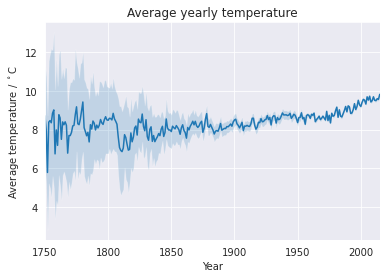

In [82]:
import pandas as pd

# create the figure (fig) and axes (ax) objects
fig, ax = plt.subplots()

# first we extract the years from YYYY-MM-DD format
mask = df['dt'].dt.year

# apply the mask to the average yearly temperature and its uncertainty
df_avg_yearly_temp = df.groupby(mask)['LandAverageTemperature'].agg(['mean']).reset_index()
df_avg_yearly_temp_uncert = df.groupby(mask)['LandAverageTemperatureUncertainty'].agg(['mean']).reset_index()

# x-data is the year column and y-data is the mean column
x_dat = df_avg_yearly_temp['dt']
y_dat = df_avg_yearly_temp['mean']

# uncertainty data
x_uncer_dat = df_avg_yearly_temp_uncert['dt']
y_uncer_dat = df_avg_yearly_temp_uncert['mean']

# plot the data
ax.plot(x_dat,y_dat)
ax.fill_between(x_dat, y_dat-y_uncer_dat, y_dat+y_uncer_dat , alpha=0.2)

# add the axis labels using set_xlabel and set_ylabel
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature / $^\circ$C')

# set title using set_title
ax.set_title('Average yearly temperature')

# set the range of the x-axis data
ax.set_xlim([1750, 2015])

# print the plot to screen
plt.show()

* This plot shows us that the confidence interval was very large for years before 1875 but is much smaller afterwards.

* We can also mask for individual months and then compare monthly temperatures across all the years. Lets compare the average land temperatures in July and December:

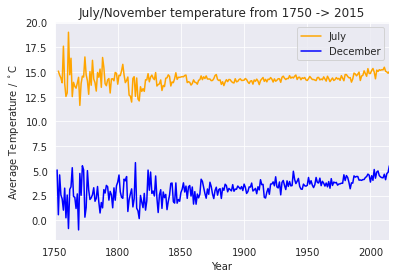

In [83]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # this is a separate plotting library to matplotlib but interfaces with it nicely
                      # seaborn is a wrapper around matplotlib and improves the visual aesthetics of plots, interfaces with pandas better and simplifies plotting syntax

# set a dark grid style for the plot (looks nice!)
sns.set_style("darkgrid")

# read the data file using pd.read_csv()
df = pd.read_csv("data/GlobalLandTemperatures_GlobalTemperatures.csv")

# we tell the DataFrame that the 'dt' column is a date-time format. This is a smart command and will be able to understand a variety of date-time formats
df['dt'] =  pd.to_datetime(df['dt'])
# create the figure (fig) and axes (ax) objects
fig, ax = plt.subplots()

# first we extract the months from YYYY-MM-DD format
mask = df['dt'].dt.month

jul_mask = df['dt'].dt.month == 7
dec_mask = df['dt'].dt.month == 12

df_jul_temp = df[jul_mask]['LandAverageTemperature']
df_dec_temp = df[dec_mask]['LandAverageTemperature']

# x-data is the year column and
x_dat = df[jul_mask]['dt'].dt.year

ax.plot(x_dat,df_jul_temp, label="July", color='orange')
ax.plot(x_dat,df_dec_temp, label="December", color='blue')

# add the axis labels using set_xlabel and set_ylabel
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature / $^\circ$C')

# set the range of the x-axis data
ax.set_xlim([1750, 2015])

# set title using set_title
ax.set_title('July/November temperature from 1750 -> 2015')

ax.legend()
# print the plot to screen
plt.show()

matplotlib is able to plot a **huge variety** of different plot types

* We have covered some of the fundamentals of pandas and matplotlib and we will be using both these libraries in the following sessions, so our learning will continue. 
* Before we end, we will just learn some general matplotlib commands and syntax using short worked examples; highlighting how to plot functions, customise your plots etc...:

### Function Plots

In [ ]:
# create the figure (fig) and axes (ax) objects
fig, ax = plt.subplots()

# create x range from 0 -> 2Pi with a step of 0.1
x = np.arange(0, 2*np.pi, 0.1)   # start, stop, step

y1 = np.cos(x)
y2 = np.sin(x)

plt.plot(x, y1, label = 'cos')
plt.plot(x, y2, label = 'sin')

plt.legend()
plt.show()

### Custom Line Styles and Colours

Custom line styles can be specified by adding the following to your plot command::
* `'-'` : Solid line.
* `'--'`: Dashed line.
* `':'` : Dotted line.
* `':.'`: Dot-dashed line.

Custom line styles can also be specified but we will not cover that here. Colours can be specified by adding `color = ` to your plotting command. Note the spelling of color! There is a [large variety of possible colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) but it is also possible to specifiy colours using RGB values which means any colour can be used. 

Consider the plot of cos(x) and sin(x) this time using custom colours and line styles:

In [ ]:
# create the figure (fig) and axes (ax) objects
fig, ax = plt.subplots()

# create x range from 0 -> 2Pi with a step of 0.1
x = np.arange(0, 2*np.pi, 0.1)   # start, stop, step

y1 = np.cos(x)
y2 = np.sin(x)

plt.plot(x, y1, ':', color = 'orange' ,label = 'cos')
plt.plot(x, y2, '--', color = 'blue' ,label = 'sin')

plt.legend()
plt.show()

### Markers

There are a [wide variety](https://matplotlib.org/api/markers_api.html) of data markers available with a selection printed below:
<center><img src="https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/images/matplotlib_markers.png" width="600" height="600" /></center>

Consider the plot of cos(x) and sin(x) this time using custom colours and colours:

In [ ]:
# create the figure (fig) and axes (ax) objects
fig, ax = plt.subplots()

# create x range from 0 -> 2Pi with a step of 0.1
x = np.arange(0, 2*np.pi, 0.1)   # start, stop, step

y1 = np.cos(x)
y2 = np.sin(x)

plt.plot(x, y1, 'd', color = 'orange', markersize=4, label = 'cos')
plt.plot(x, y2, '.', color = 'blue' , markersize=4, label = 'sin')

plt.legend()
plt.show()

## Review

In this session we covered:

* what pandas is and the key differences it has compared to Excel.
* What Series, DataFrames and Panels are, the three main pandas object types.
* How to manually build a DataFrame.
* How to read data into Python using pandas.
* How to manipulate and access the data using pandas.
* How to plot data from a DataFrame using matplotlib and the key matplotlib commands.
* How to apply masks to your data to access specific information and then plot it.

## Exercise

Below is a tuple containing the neutral atomic radii (in picometres) of the first 18 elements. Create a plot of this data that contains markers that clearly show the location of each data point (i.e., the plot shouldn't just be a line). Check to make sure you plotted the radii against the correct atomic numbers, and be sure to label both the x and y axes.

In [ ]:
radius_pm = (37, 32, 152, 112, 85, 77, 70, 73, 72, 70, 186, 160, 143, 118, 110, 103, 99, 98)